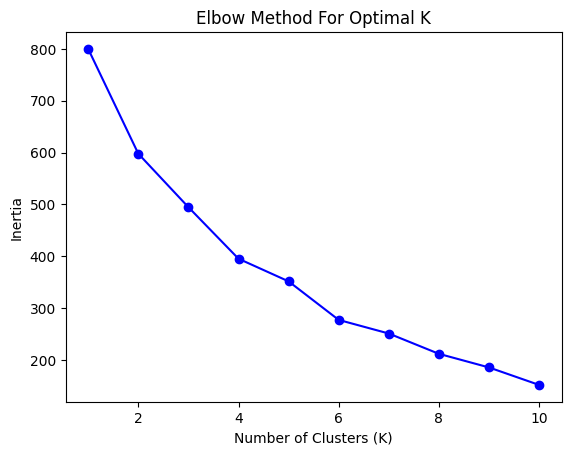

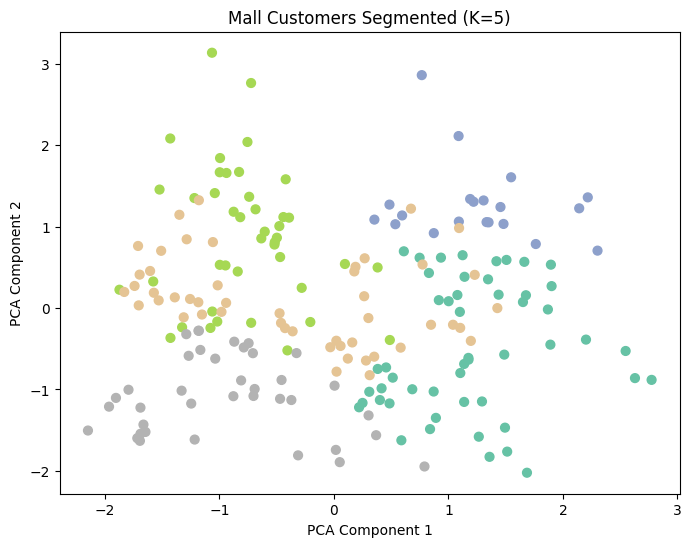

Silhouette Score for K=5: 0.27191023466188324


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: Load Dataset
df = pd.read_csv(r"C:\Users\shivangi\OneDrive\Desktop\task elevate\Mall_Customers.csv")  

df.drop('CustomerID', axis=1, inplace=True)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

#PCA for 2D Visualization (optional but useful)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#Elbow Method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()

#Fit KMeans with optimal K 
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

#Visualize Clusters in 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='Set2', s=40)
plt.title(f'Mall Customers Segmented (K={optimal_k})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

#Silhouette Score
score = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score for K={optimal_k}:", score)
